## Compare CO integrated spectra within IDL (red) and Python (blue) masks.  
### See edge_compare_mom notebook for details.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table, unique, Column
from matplotlib.ticker import MultipleLocator
from matplotlib.backends.backend_pdf import PdfPages

In [2]:
def specplots(gallist=None, line='co', tab1=None, tab2=None, typ='Dilated', 
              lbl='edgespec', nx=7, ny=5, colors=['r','b'], pdfout=False):

    pages = int(np.ceil(float(len(gallist)) / (nx*ny)))
    if pdfout:
        pp = PdfPages(lbl + '.' + typ + '.pdf')

    for num in range(0,pages):
        aa = nx*ny*num
        bb = nx*ny+aa
        sublist = gallist[aa:bb]

        fig = plt.figure(0)
        fig.set_size_inches(nx*4.5, ny*4.)

        for idx, gal in enumerate(sublist):
            galrows1 = tab1[tab1['Name']==gal]
            galrows2 = tab2[tab2['Name']==gal]
            row, col = divmod(idx,nx)
            ax = plt.subplot2grid((ny,nx),(row,col))
            ax.axhline(y=0, xmin=0, xmax=1, color='black', ls=':')

            vel = galrows1['coVlsr_smo7']
            for i, spectab in enumerate([galrows1, galrows2]):
                flux   = spectab[line+typ+'Spec_smo7']
                eflux  = spectab[line+typ+'Unc_smo7']
                spec  = ax.step(vel, flux, color=colors[i], where='mid')
                if typ == 'Dilated' or typ == 'Smooth':
                    ax.fill_between(vel, flux-eflux, flux+eflux, 
                                    step='mid',facecolor=colors[i], alpha=0.6)
                ax.set_xlim(vel[0], vel[-1])
                plt.tick_params(axis='x', labelsize='medium')
                plt.tick_params(axis='y', labelsize='large')
                start, end = ax.get_xlim()
                if (end-start)>1000:
                    majorLocator = MultipleLocator(400)
                else:
                    majorLocator = MultipleLocator(200)
                ax.xaxis.set_major_locator(majorLocator)
                imax = max(1,np.ceil(0.25+max(2*flux)))
                ax.set_ylim([-0.1*imax, 0.5*imax])
            ax.set_title(gal, fontsize='x-large')

        fig.text(0.5, 0.09, 'VELO-LSR (km/s)', ha='center',
                    fontsize='xx-large')
        fig.text(0.1, 0.5, 'Flux (Jy)', va='center', rotation='vertical', 
                    fontsize='xx-large')
        if pdfout:
            pp.savefig(bbox_inches = 'tight', pad_inches=0.1)
            plt.close()
        else:
            plt.show()

    if pdfout:
        d = pp.infodict()
        d['Title'] = 'EDGE Gallery'
        d['Author'] = 'Tony Wong'
        d['CreationDate'] = datetime.datetime.today()
        pp.close()    
    return

In [3]:
# --- Read the data
data_idl = Table.read('../smo7_idlmom/cospec_smo7.csv', format='ascii.ecsv')
data_py  = Table.read('../smo7_mom_vrad/edge_cospec_smo7.csv', format='ascii.ecsv')
gallist = unique(data_idl, keys='Name').columns[0].tolist()
print('Number of galaxies: {}'.format(len(gallist)))

Number of galaxies: 126


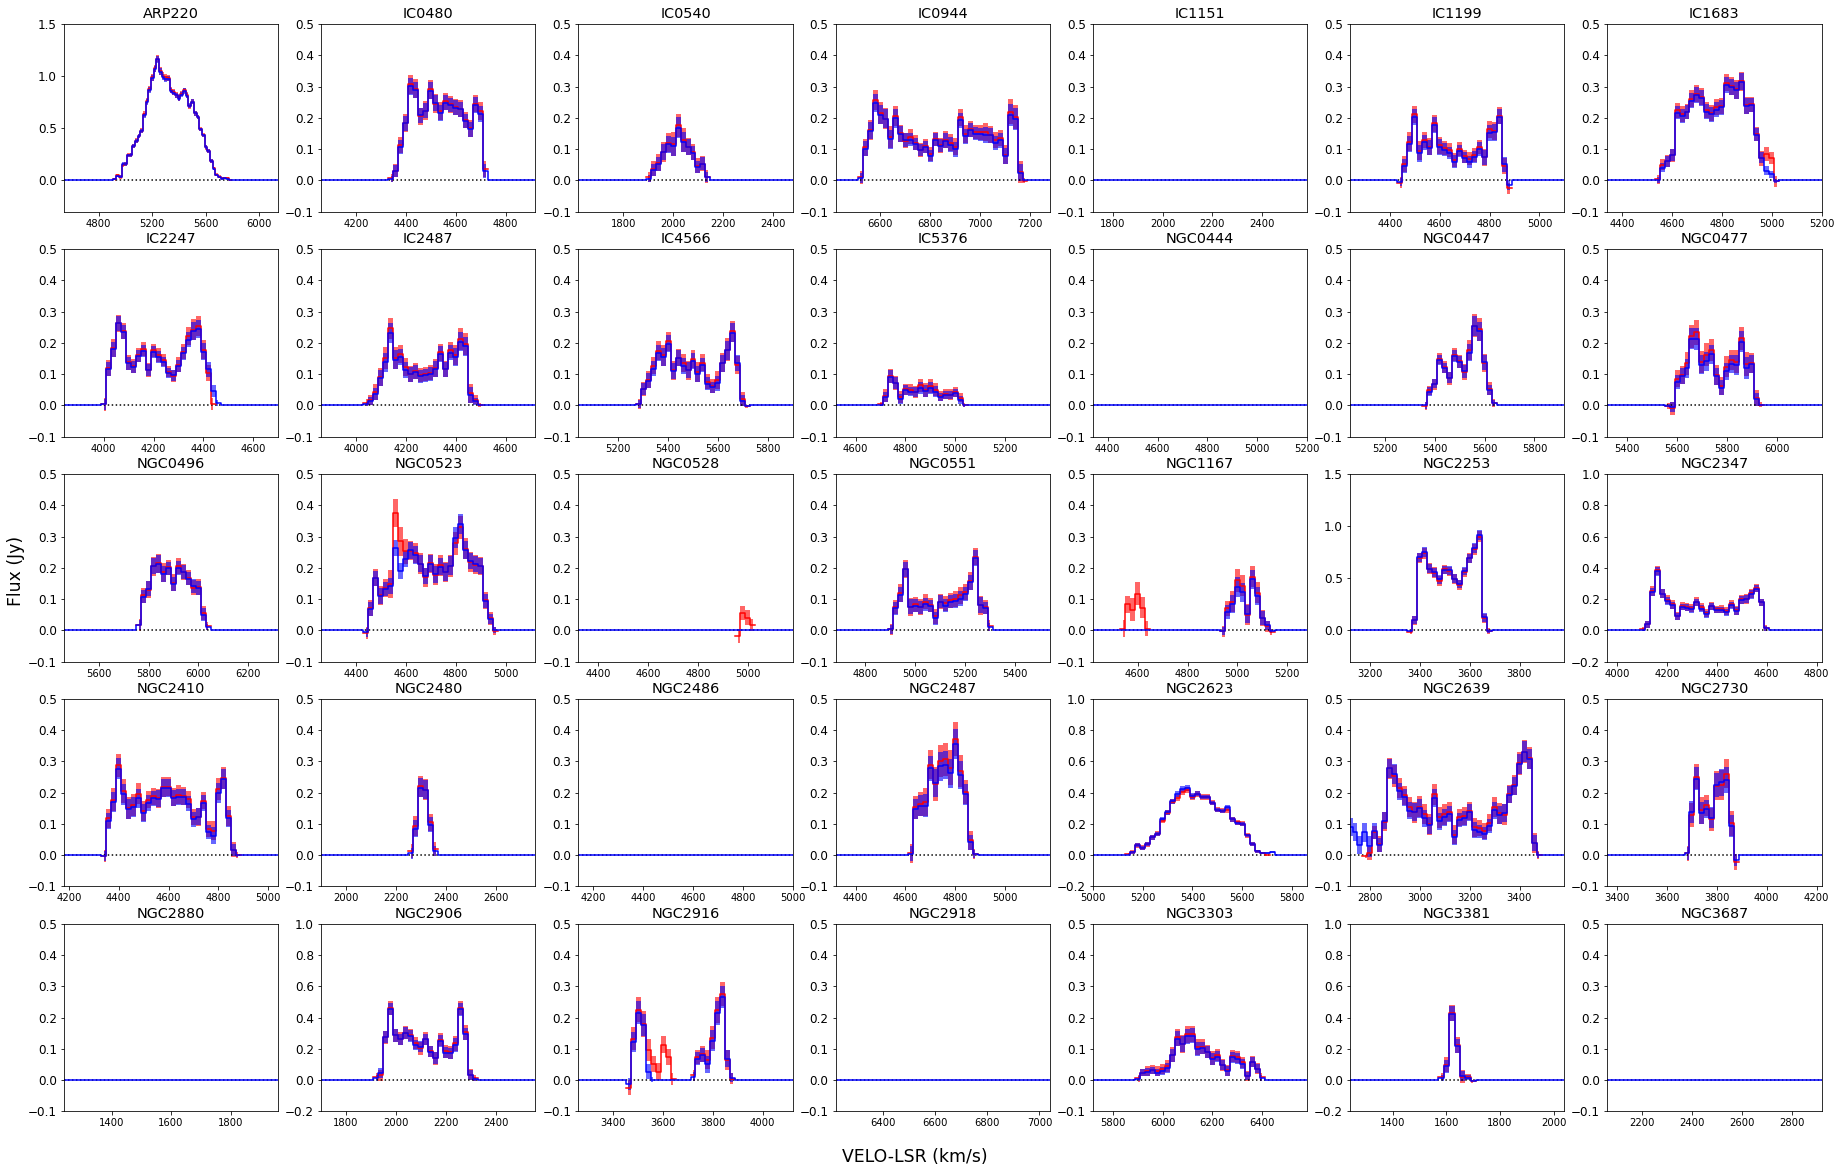

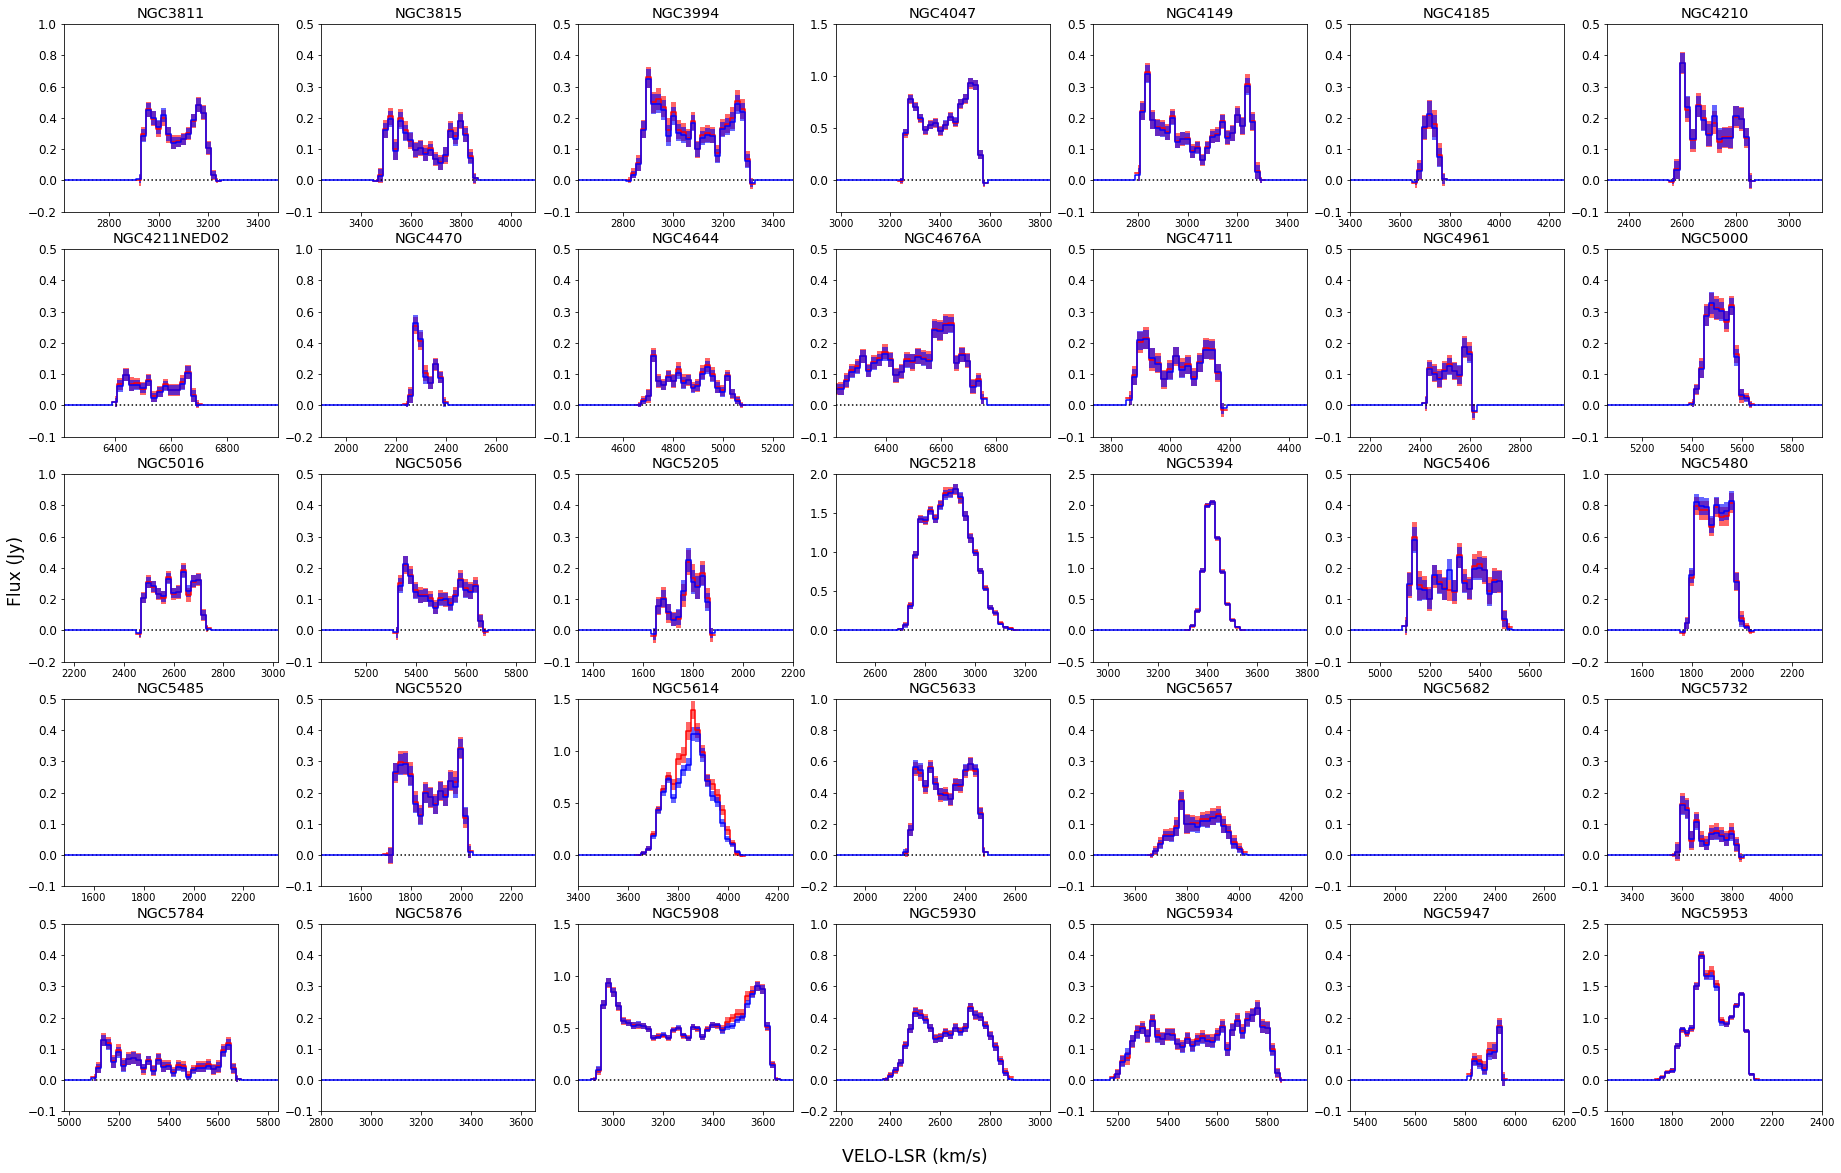

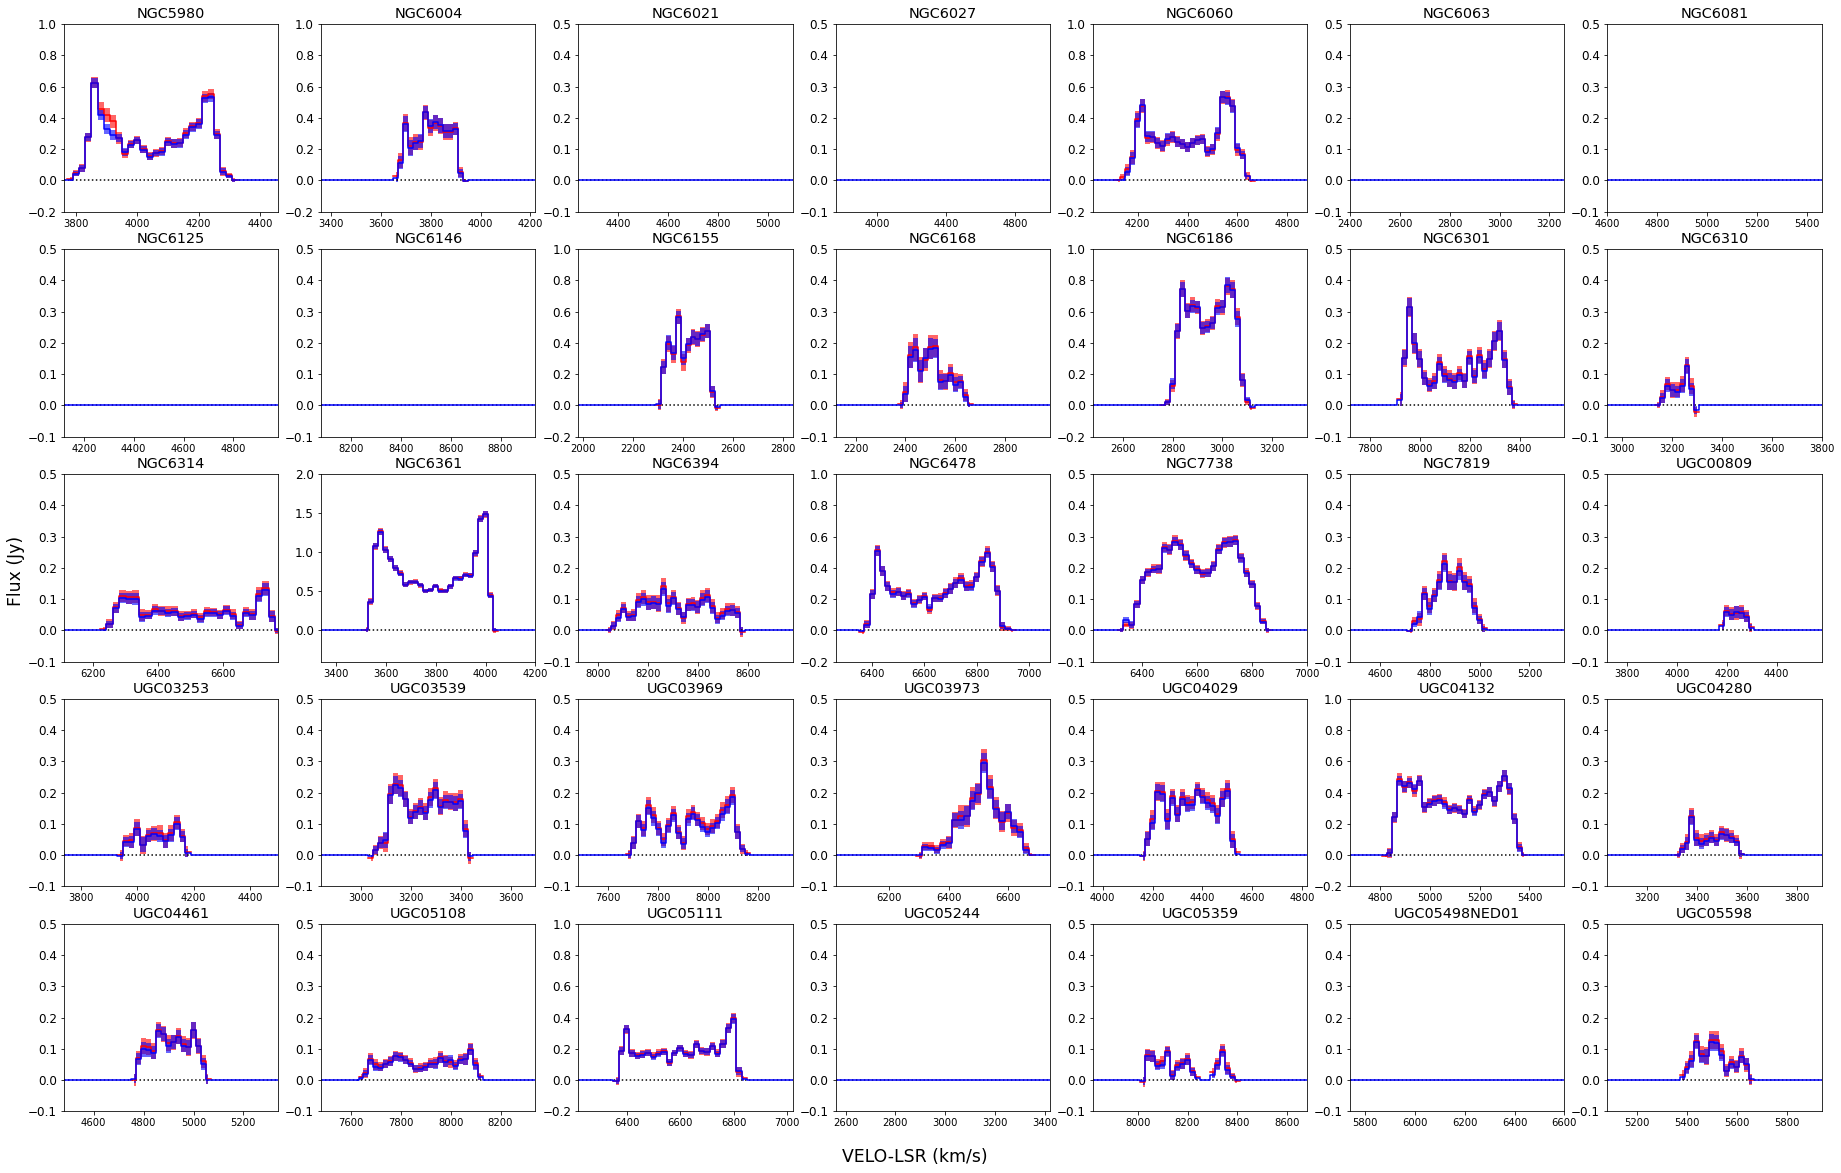

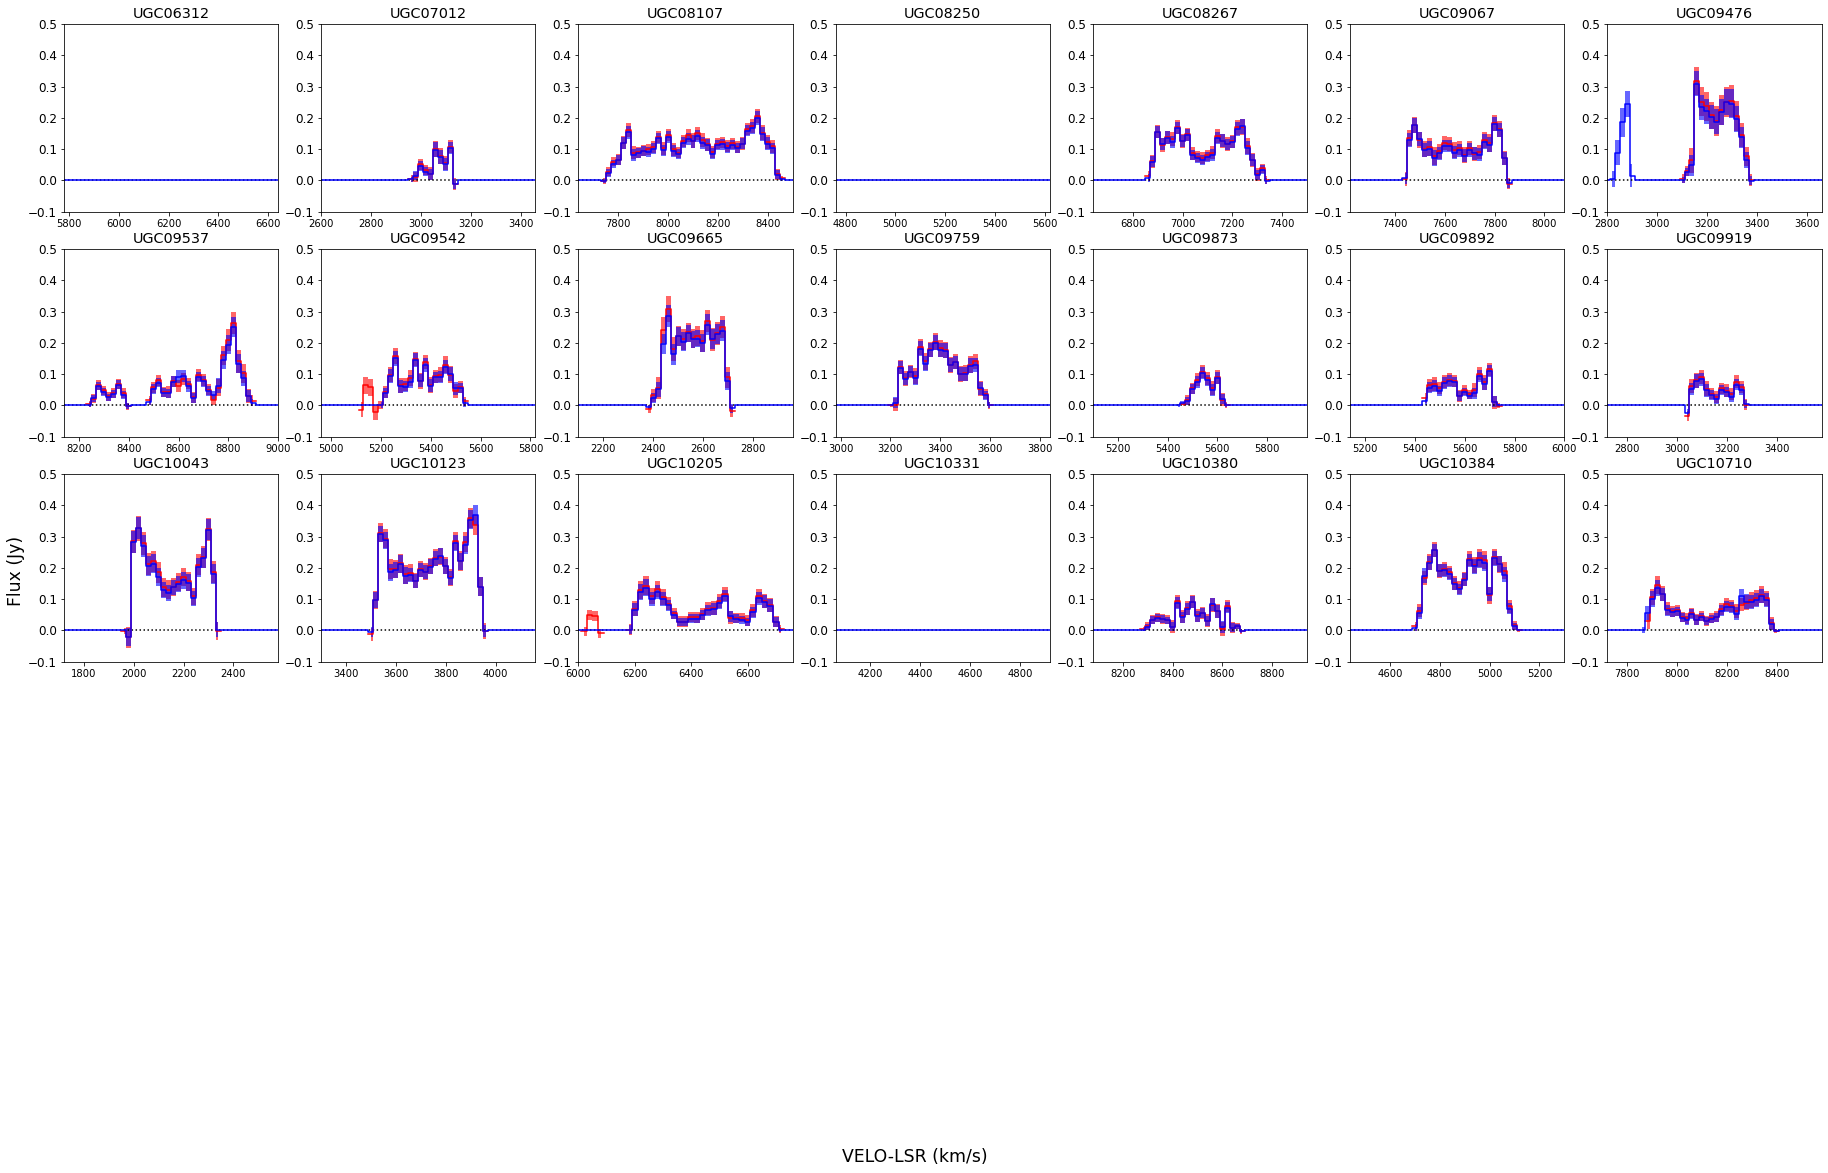

In [4]:
specplots(gallist=gallist, tab1=data_idl, tab2=data_py, typ='Dilated', colors=['r','b'])

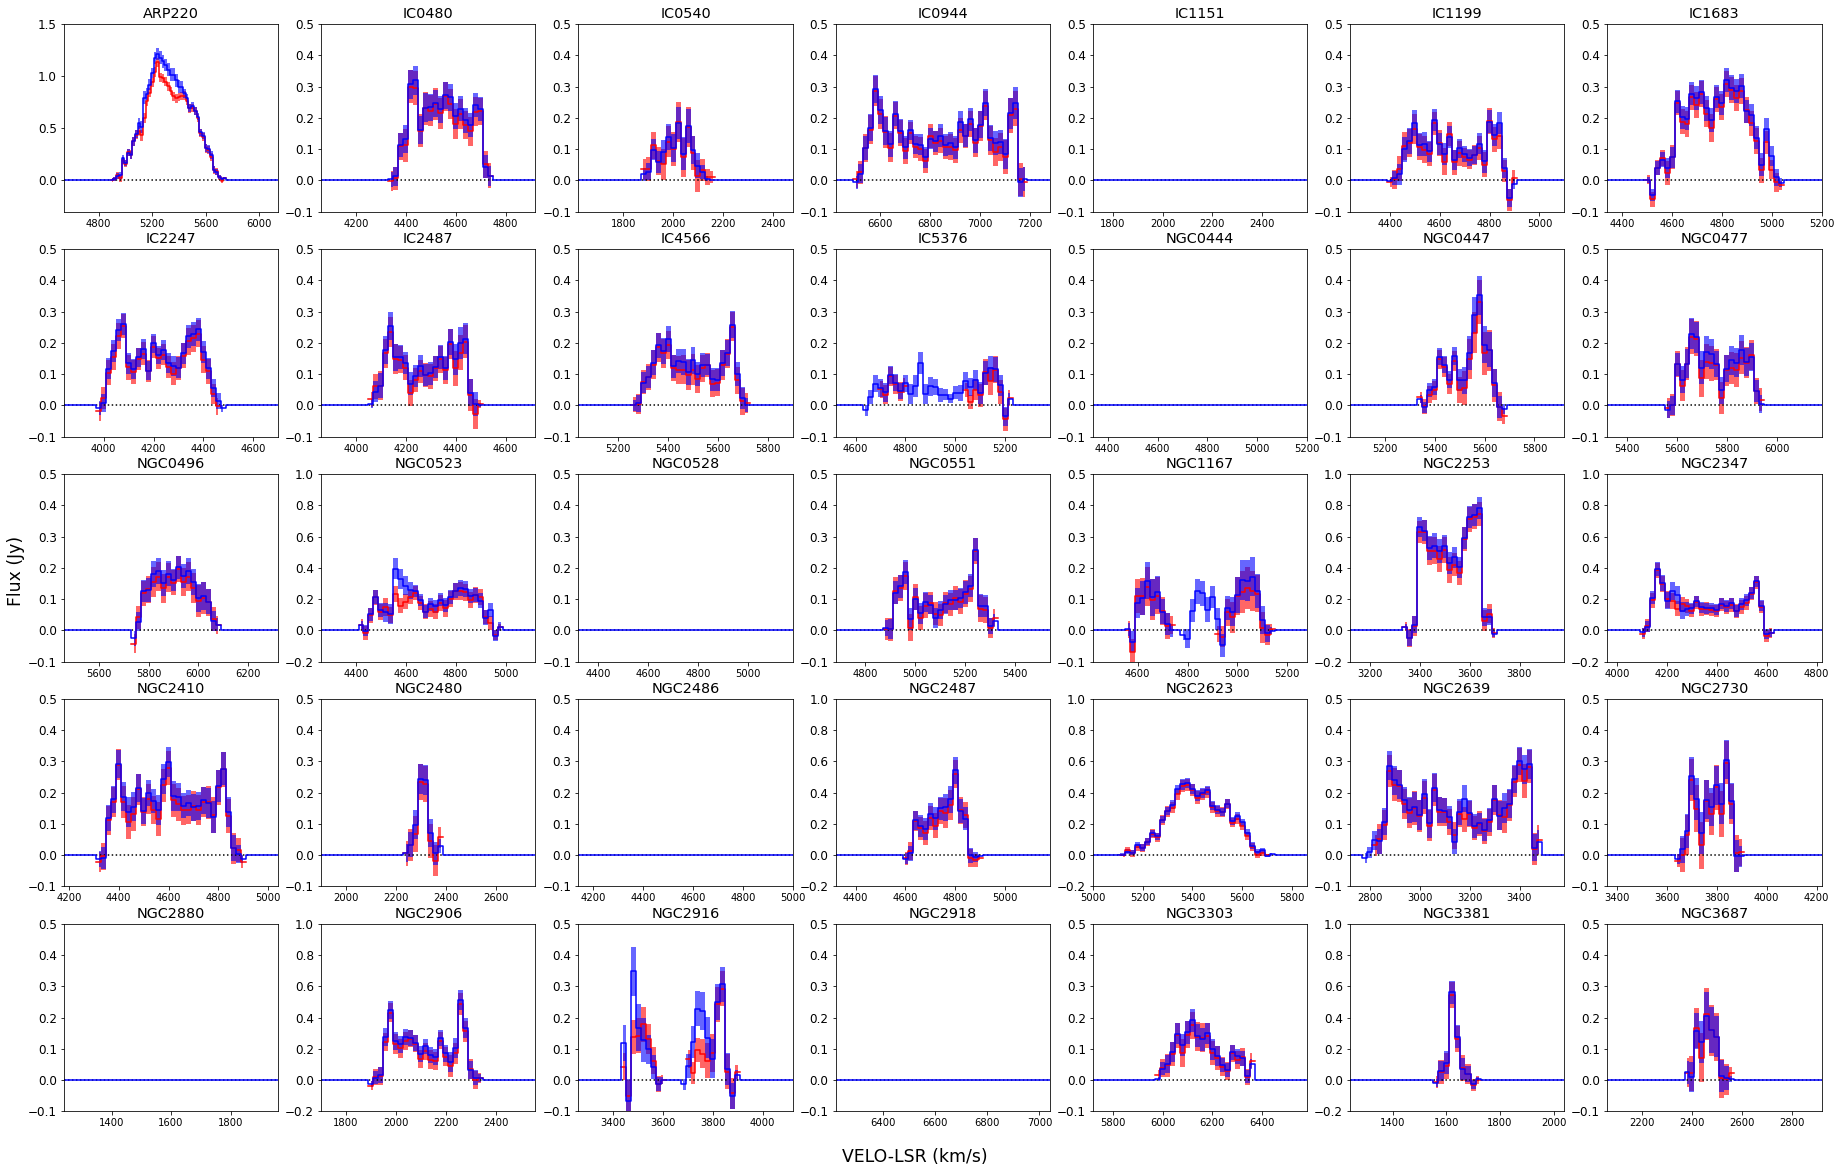

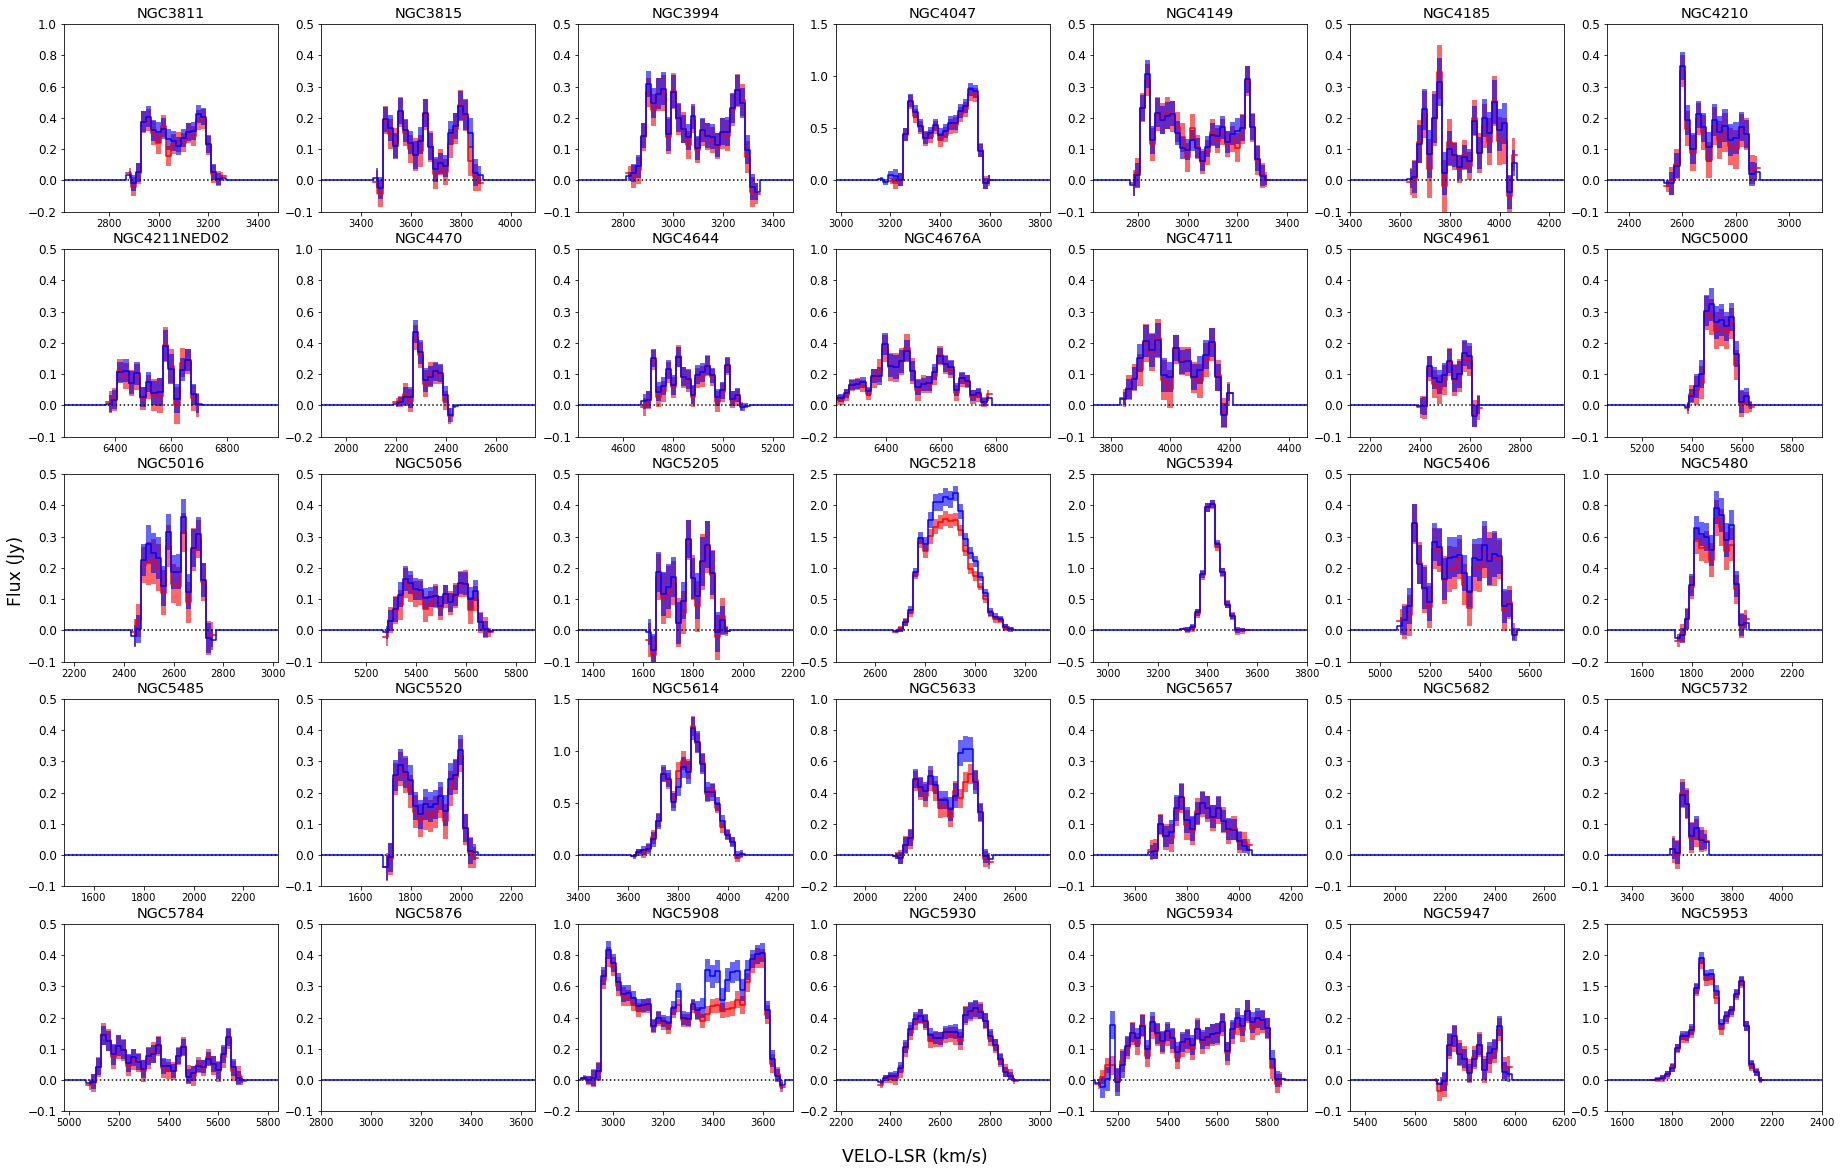

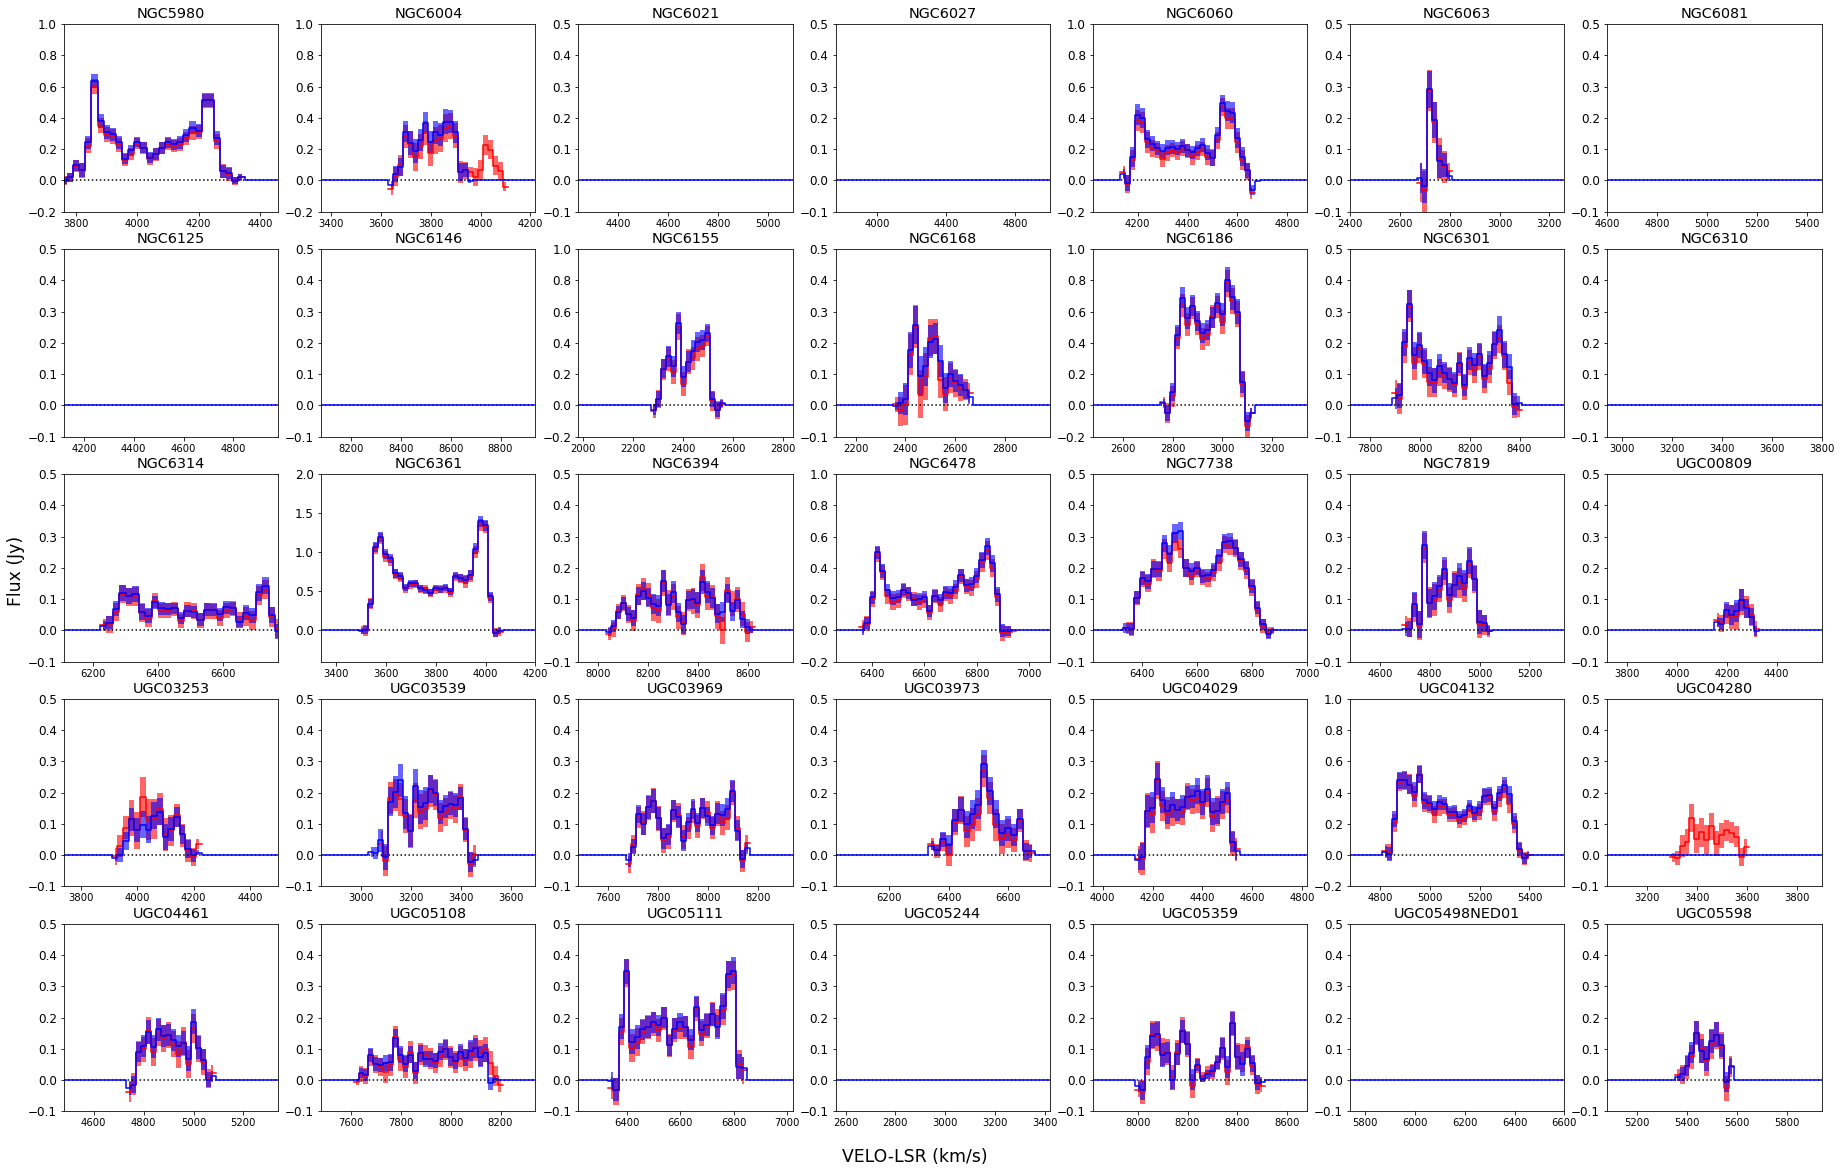

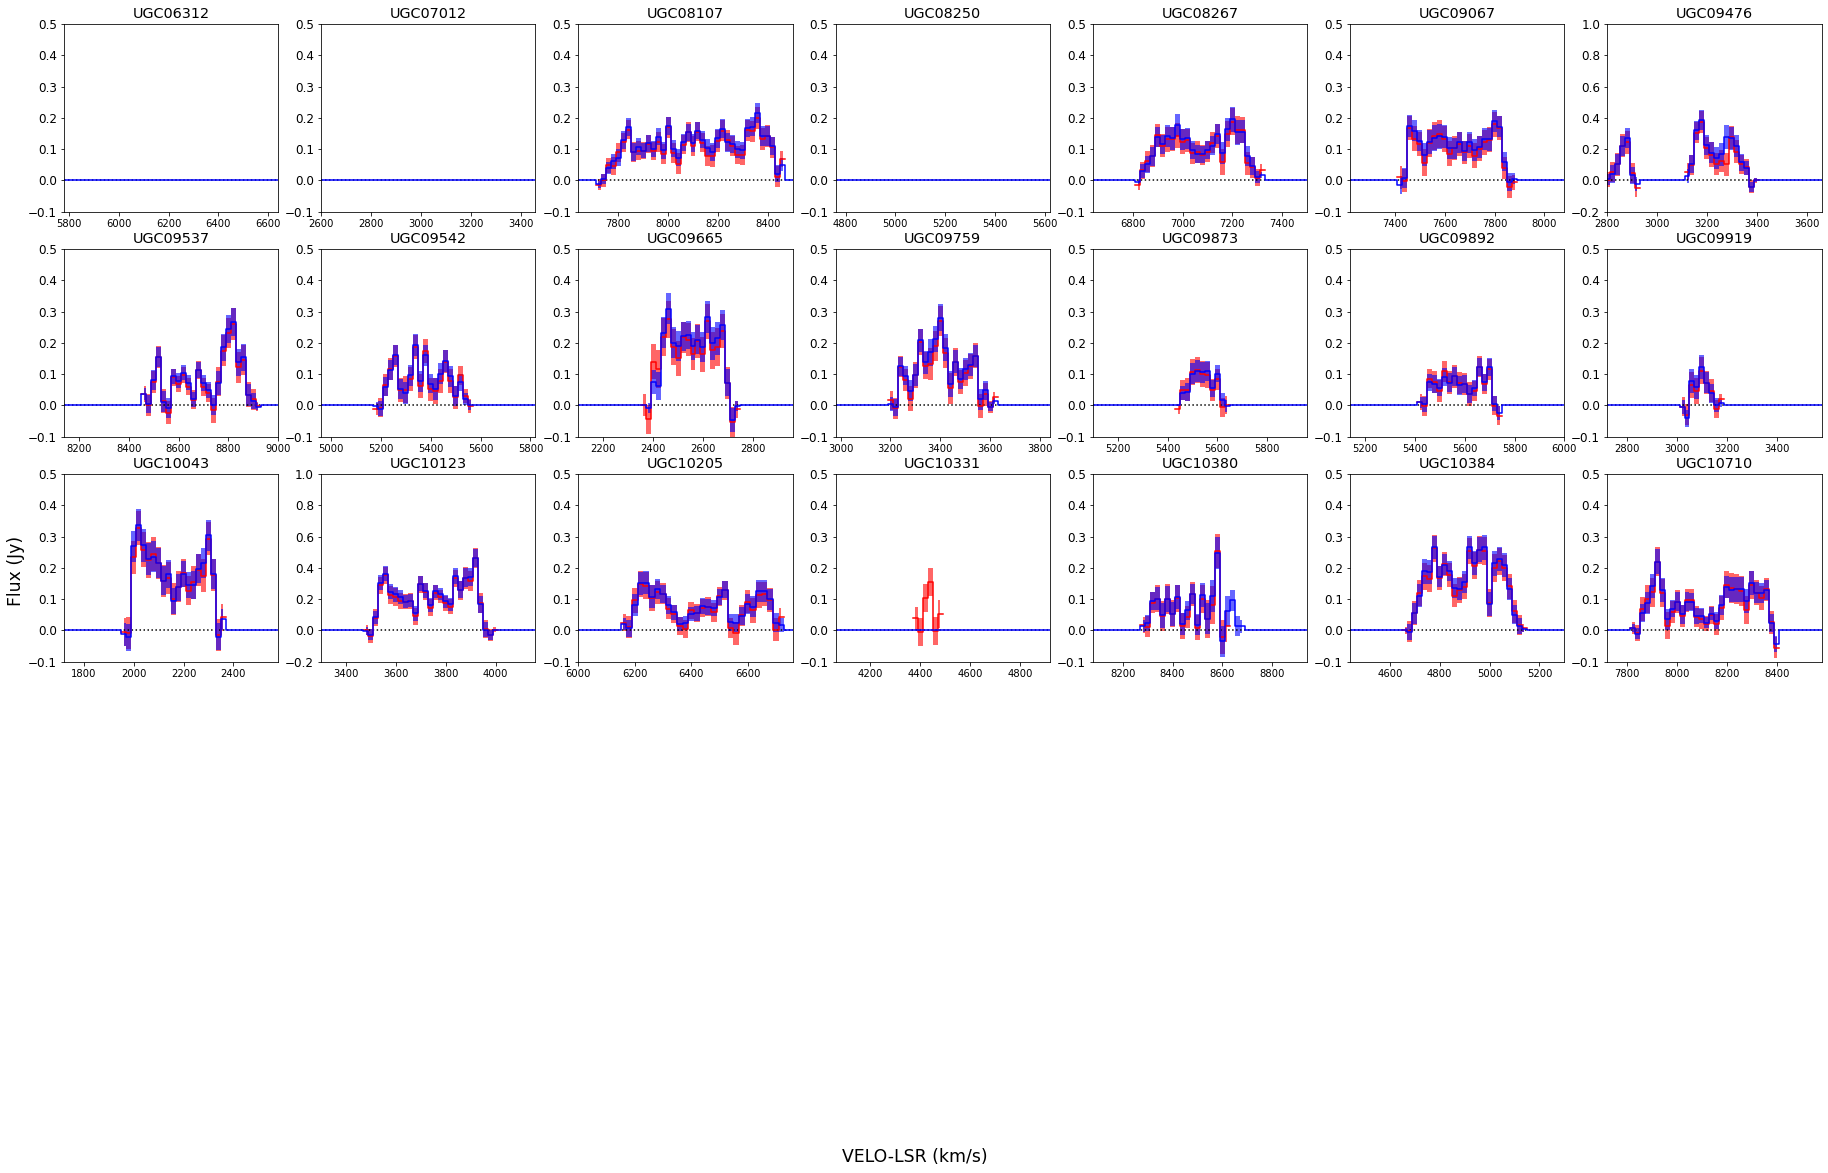

In [5]:
specplots(gallist=gallist, tab1=data_idl, tab2=data_py, typ='Smooth', colors=['r','b'])